# Bayesnetz Klassifikation

## Pysmile laden

Pysmile kann über den untenstehenden Befehl geladen werden.

In [ ]:
# Pysmile Bibliothek laden
!pip install --index-url https://support.bayesfusion.com/pysmile-A/ pysmile

Looking in indexes: https://support.bayesfusion.com/pysmile-A/


## Bibliotheken laden

In [ ]:
# Notwendige Bibliotheken laden
import pysmile
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lizenz aktivieren
pysmile.License((
	b"SMILE LICENSE a69bbace fb6acb09 4764a022 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 3flme78g1zfi2eu8jq4h8qhdi "
	b"Issued for: Julian Blazek (julian.blazek.2000@gmail.com) "
	b"Academic institution: DHBW Stuttgart "
	b"Valid until: 2021-06-22 "
	b"Issued by BayesFusion activation server"
	),[
	0xd1,0x17,0x29,0x40,0xe2,0x67,0xbe,0x78,0x07,0x77,0xa6,0x0c,0x26,0xcf,0xe2,0xf4,
	0xaf,0x1c,0xce,0xa1,0x76,0x9a,0xe1,0x94,0x98,0x55,0x00,0x1a,0x0a,0xed,0x78,0xa4,
	0xe2,0x12,0xeb,0x0d,0x00,0x67,0xf8,0x5b,0x68,0x00,0xf0,0xe9,0x16,0x6a,0x3c,0xe9,
	0x1d,0xb7,0x82,0x7d,0x1e,0xe9,0x73,0x28,0x43,0xdf,0xa8,0x9b,0xcf,0x5d,0x2f,0x82])


ValueError: ignored

In [ ]:
#test = pd.read_csv('P1_DP11_Wohnungen_Test.csv')

## Netz importieren und verifizieren

In [ ]:
# Netz initialisieren
net = pysmile.Network()

In [ ]:
# Bereits erstelltes Netz laden
net.read_file("P1_DP11_Wohnungen_X_3.xdsl")

In [ ]:
# Alle Nodes ausgeben (Verifikation, dass Import geklappt hat)
net.get_all_node_ids()

['\ufeffZimmerzahl',
 'Aufzug',
 'Stockwerk',
 'Alter',
 'Heizung',
 'Hausmeister',
 'Lage',
 'Kindergarten',
 'Schule',
 'S_Bahn',
 'Garage',
 'Bad',
 'Balkon',
 'Terrasse',
 'Quadratmeter',
 'Miete',
 'Nebenkosten',
 'Kaution',
 'Kueche',
 'Kehrwoche',
 'Moebliert',
 'Studierende',
 'Kleinfamilie',
 'DINK',
 'Alleinerziehende',
 'Expatriate',
 'Rentnerpaar']

In [ ]:
net.set_node_id("\ufeffZimmerzahl", "Zimmerzahl")

In [ ]:
# Beispielsausgabe, alle Kindernodes von "Miete"
net.get_child_ids('Miete')


['Kaution', 'Studierende', 'Kleinfamilie', 'Alleinerziehende', 'Rentnerpaar']

In [ ]:
net.update_beliefs()

In [ ]:
beliefs = net.get_node_value("Studierende")
beliefs

[0.1800559339456709, 0.8199440660543291]

In [ ]:
net.set_evidence("Terrasse", "ja")

In [ ]:
net.set_evidence("Moebliert", "ja")

In [ ]:
net.update_beliefs()

In [ ]:
net.get_node_value("Studierende")

[0.300114407085491, 0.699885592914509]

In [ ]:
# Evidences zurücksetzen
net.clear_all_evidence()
net.update_beliefs()

## Dataset laden und Anpassungen

In [ ]:
ds = pysmile.learning.DataSet()

In [ ]:
import re
def adjustNames(names):
  i = 2
  newnames = []
  for name in names:
    if name[:1].isdigit():
      name = 's_' + name
    #name = re.sub('\s|\.|-|\(|\)', '_', name)
    name = re.sub('\W', '_', name)
    if name in newnames:
      name = name + str(i)
      i = i+1
    newnames.append(name)
  return newnames

In [ ]:
adjustNames(['1.Stock','2-Stock)-(','1.Stock'])

['s_1_Stock', 's_2_Stock___', 's_1_Stock2']

In [ ]:
ds.read_file("P1_DP11_Wohnungen_Test.csv")
for i in range(ds.get_variable_count()):
  state_names = ds.get_state_names(i)
  state_names = adjustNames(state_names)
  ds.set_state_names(i, state_names)

## Validierung

In [ ]:
matches = ds.match_network(net)

In [ ]:
validator = pysmile.learning.Validator(net, ds, matches)

In [ ]:
for output in ['Studierende', 'Kleinfamilie', 'DINK', 'Alleinerziehende', 'Expatriate', 'Rentnerpaar']:
  validator.add_class_node(net.get_node(output))

In [ ]:
validator.test()

In [ ]:
results = validator.get_result_data_set()

In [ ]:
results.write_file('results.csv')

Studierende
1.0


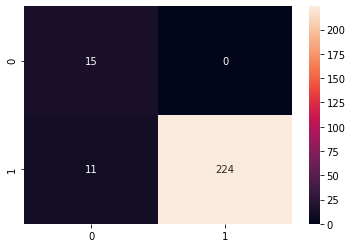

Kleinfamilie
0.9166666666666666


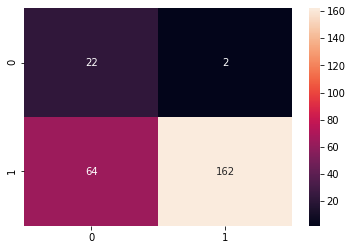

DINK
0.0


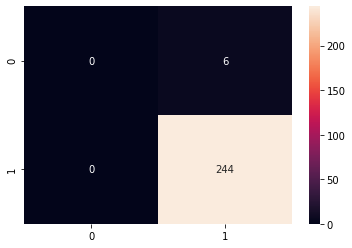

Alleinerziehende
0.0


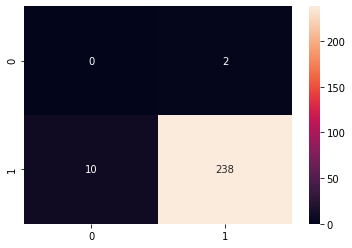

Expatriate
nan


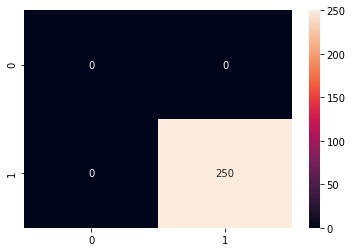

Rentnerpaar
0.0


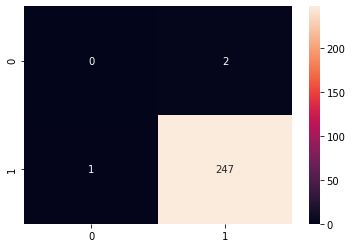

In [ ]:
#import seaborn as sb
#import matplotlib.pyplot as plt
#import numpy as np

for output in ['Studierende', 'Kleinfamilie', 'DINK', 'Alleinerziehende', 'Expatriate', 'Rentnerpaar']:
  print(output)
  print(validator.get_accuracy(output, "ja"))
  sb.heatmap(validator.get_confusion_matrix(output), annot = True, fmt = 'd')
  plt.show()

In [ ]:
# for i in range(ds.get_variable_count()):
#   print(list(ds.get_variable_id(i)))
#   print(ds.get_int(i, 9))
#   if ds.get_variable_id(i) in ['Studierende', 'Kleinfamilie', 'DINK', 'Alleinerziehende', 'Expatriate', 'Rentnerpaar']:
#     continue
#   net.set_evidence(net.get_node(ds.get_variable_id(i).replace('\ufeff', '').replace('-', '_')), ds.get_int(i, 9))

In [ ]:
net.update_beliefs()

In [ ]:
tuple(zip(net.get_outcome_ids("Studierende"), net.get_node_value("Studierende")))

(('ja', 0.1800559339456709), ('nein', 0.8199440660543291))

## Klassifikation

In [ ]:
def predict(ds, row):
  net.clear_all_evidence()
  for i in range(ds.get_variable_count()):
    if ds.get_variable_id(i) in ['Studierende', 'Kleinfamilie', 'DINK', 'Alleinerziehende', 'Expatriate', 'Rentnerpaar']:
      continue
    net.set_evidence(net.get_node(ds.get_variable_id(i).replace('\ufeff', '').replace('-', '_')), ds.get_int(i, row))
  net.update_beliefs()

In [ ]:
# Beispielsausgabe Werte für "Studierende"
for row in range(ds.get_record_count()):
  predict(ds, row)
  print(row, tuple(zip(net.get_outcome_ids("Studierende"), net.get_node_value("Studierende"))))

0 (('ja', 0.02), ('nein', 0.98))
1 (('ja', 0.02), ('nein', 0.98))
2 (('ja', 0.04166666666666666), ('nein', 0.9583333333333333))
3 (('ja', 0.01923076923076923), ('nein', 0.9807692307692308))
4 (('ja', 0.02), ('nein', 0.98))
5 (('ja', 0.02941176470588235), ('nein', 0.9705882352941176))
6 (('ja', 0.025), ('nein', 0.9750000000000001))
7 (('ja', 0.0625), ('nein', 0.9375))
8 (('ja', 0.03333333333333333), ('nein', 0.9666666666666667))
9 (('ja', 0.6818181818181819), ('nein', 0.3181818181818182))
10 (('ja', 0.6666666666666666), ('nein', 0.3333333333333333))
11 (('ja', 0.0108695652173913), ('nein', 0.9891304347826086))
12 (('ja', 0.1666666666666667), ('nein', 0.8333333333333333))
13 (('ja', 0.04166666666666666), ('nein', 0.9583333333333333))
14 (('ja', 0.0131578947368421), ('nein', 0.9868421052631579))
15 (('ja', 0.07142857142857142), ('nein', 0.9285714285714285))
16 (('ja', 0.02), ('nein', 0.98))
17 (('ja', 0.0108695652173913), ('nein', 0.9891304347826086))
18 (('ja', 0.02), ('nein', 0.98))
19 

## Finale Klassifikation

In [ ]:
# Ergebnisausgabe
outputs = ['Studierende', 'Kleinfamilie', 'DINK', 'Alleinerziehende', 'Expatriate', 'Rentnerpaar']
print('i\t\t', '\t'.join(outputs), sep = '')
for row in range(ds.get_record_count()):
  predict(ds, row)
  row_string = str(row)
  for output in outputs:
    row_string = row_string + '\t\t' + net.get_outcome_ids(output)[net.get_node_value(output).index(max(net.get_node_value(output)))]
  print(row_string)

i		Studierende	Kleinfamilie	DINK	Alleinerziehende	Expatriate	Rentnerpaar
0		nein		ja		nein		nein		nein		nein
1		nein		ja		nein		nein		nein		nein
2		nein		nein		nein		nein		nein		nein
3		nein		ja		nein		nein		nein		nein
4		nein		nein		nein		nein		nein		nein
5		nein		ja		nein		nein		nein		nein
6		nein		nein		nein		nein		nein		nein
7		nein		nein		nein		nein		nein		nein
8		nein		nein		nein		nein		nein		nein
9		ja		ja		nein		nein		nein		nein
10		ja		nein		nein		nein		nein		nein
11		nein		ja		nein		nein		nein		nein
12		nein		ja		nein		nein		nein		nein
13		nein		ja		nein		nein		nein		nein
14		nein		nein		nein		nein		nein		nein
15		nein		ja		nein		ja		nein		nein
16		nein		nein		nein		nein		nein		nein
17		nein		nein		nein		nein		nein		nein
18		nein		nein		nein		nein		nein		nein
19		ja		nein		nein		nein		nein		nein
20		nein		nein		nein		nein		nein		nein
21		nein		nein		nein		nein		nein		nein
22		nein		nein		nein		nein		nein		nein
23		ja		ja		nein		ja		nein		ja
24		nein		nein		nein		nein		nein		n

In [ ]:
''

''